#### 变量名称的介绍

authou 游客id

rating 游客对本次购物的对平台评价得分

year 产生订单的日期

amount 消费金额

frequency 顾客在该平台（KLOOK）购买票的个数


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline
plt.style.use('ggplot') #更改绘图风格，R语言绘图库的风格
plt.rcParams['font.sans-serif']=['SimHei']

1. 初始数据

In [4]:
df=pd.read_csv(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\kelu.csv")
#第一列列是pandas自动插上的索引列
df.info()
# 所有数据非空
# time是object格式，没办法直接操作，需要转成datetime格式

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [5]:
df.describe()
# 根据平均分92和50%分位数可知大部分用户评分在100，效果非常不错
# 16年到19年门票价格都是110


,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


2. 分析数据

a1.每天的销量分析


<Axes: xlabel='time'>

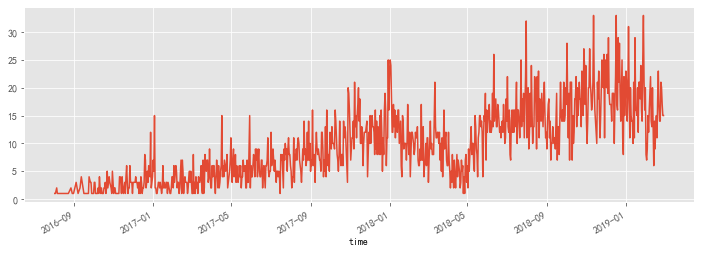

In [12]:
df['time']=pd.to_datetime(df['time'],format='%Y/%m/%d')
df.describe()
df.groupby('time')['rating'].count().plot(figsize=(12,4))


<Axes: xlabel='time'>

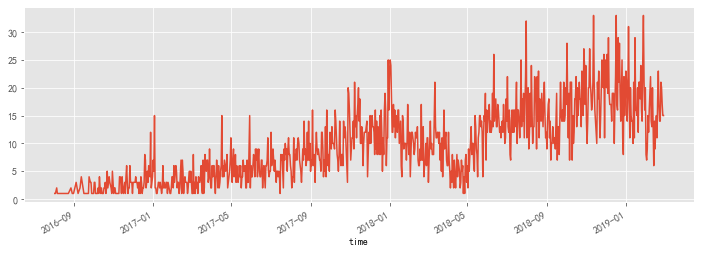

In [10]:
df['time']=pd.to_datetime(df['time'],format='%Y/%m/%d') #format='%Y/%m/%d'是表中日期的形式2018/21/23
#转换前后的表现形式相同，但是类型不一样
df.describe()
#每天的分析：需要time
df.groupby('time').count()['rating'].plot(figsize=(12,4)) #对其计数，统计每天卖出的票数
#每日销量总体是上升趋势，在18年2，3，4月份出现一次较大的波动，销量急剧下滑，猜测：外界因素，比如台风，疫情，推广不利造成。因为价格一直不变为110，所以不是价格的原因
# 16年9月-17年1月，销量非常低，每天平均2-3张门票，猜测是101观景台刚刚线上发售，观景台刚刚对外开放

a2.每月的销量分析
- 因为19，18年都有2月份，所有不能只取月份，所以要带着 年份


In [13]:
df['month']=df['time'].values.astype('datetime64[M]')
df.head()
df.groupby('month').count()['rating']

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01
2,Sha,60,2019-02-28,2019,110,1,2019-02-01
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01


Text(0.5, 1.0, '16-19年的每月销量分析')

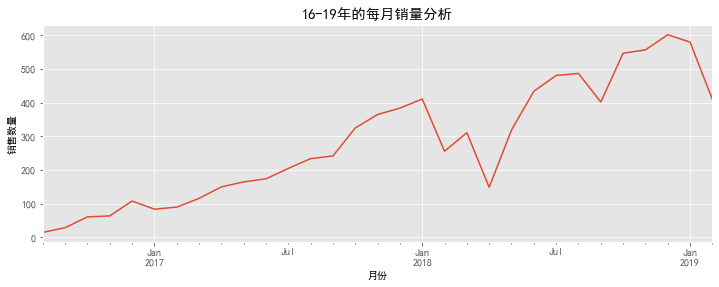

In [11]:
df['month']=df['time'].values.astype('datetime64[M]') #.values先取值，也就是去掉前面的pandas自动加上的id,只保留月份，包括前面的年份
df.head()
df.groupby('month').count()['rating'].plot(figsize=(12,4)) #按照月份维度进行计数
plt.xlabel('月份')
plt.ylabel('销售数量')
plt.title('16-19年的每月销量分析')
#月销量总体是上升趋势，在18年2，3，4月份出现一次较大的波动，销量急剧下滑，猜测：外界因素，比如台风，疫情，推广不利造成。因为价格一直不变为110，所以不是价格的原因
# 16年9月-17年1月，销量非常低，每天平均2-3张门票，猜测是101观景台刚刚线上发售，观景台刚刚对外开放

a3. 每个用户的购买量和消费金额分析

In [6]:
# merge用法：相当于sql中的join
df1=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'score':[88,90]
})
pd.merge(left=df1,right=df2,on='name') #根据name将两张表连接，相当于内连接



,name,group,score
0,zhangsan,A,88
1,lisi,B,90


In [7]:
df1=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['wangwu','lisi'],
    'score':[88,90]
})
pd.merge(left=df1,right=df2,on='name')

,name,group,score
0,lisi,B,90


In [20]:
df1=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['wangwu','lisi'],
    'score':[88,90]
})
pd.merge(left=df1,right=df2,on='name',how='inner')
pd.merge(left=df1,right=df2,on='name',how='left')
pd.merge(left=df1,right=df2,on='name',how='right')
pd.merge(left=df1,right=df2,on='name',how='inner',suffixes=['_1','_2'])

,name,group,score
0,lisi,B,90


In [14]:
df1=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['wangwu','lisi'],
    'score':[88,90]
})
pd.merge(left=df1,right=df2,on='name',how='inner') #inner join 内连接，取交集
pd.merge(left=df1,right=df2,on='name',how='right') #取并集，将没有的用NaN填充 
#left 组欧标，right 右边，on 关联字段，how:inner(默认值，交集)  outer(并集)  left(只保留左侧)  right(只保留右侧)
#suffixes:如果两个表中有多个相同时，用suffixes给的值进行区分(默认值_x,_y)
df1=pd.DataFrame({
    'name':['zhangsan','lisi'],
    'group':['A','B']
})
df2=pd.DataFrame({
    'name':['wangwu','lisi'],
    'score':[88,90],
    'group':['C','B']
})
#左右表有两个相同的字段，再连接的时候或将其分开，_x,_y
pd.merge(left=df1,right=df2,on='name',how='inner') 
pd.merge(left=df1,right=df2,on='name',how='inner',suffixes=['_1','_2']) 

,name,group_1,score,group_2
0,lisi,B,90,B


Text(0, 0.5, '消费金额')

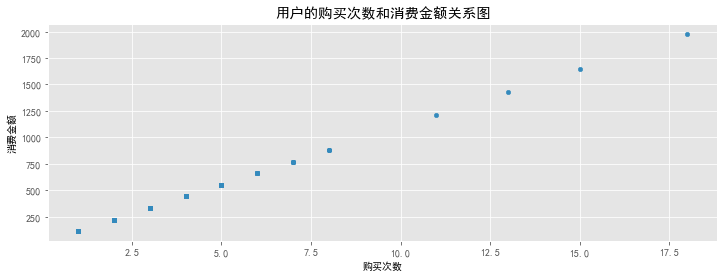

In [9]:
#按照游客分组，统计每个游客的购买次数
grouped_count_author=df.groupby('author')['frequency'].count().reset_index() #frequecy能够反映购买量，因为都是1所以可以使用count计数，否则用sum
grouped_sum_amount=df.groupby('author')['amount'].sum().reset_index()
grouped_sum_amount.tail(60)
#220说明该顾客购买了2次
user_purchase_retention=pd.merge(left=grouped_count_author,right=grouped_sum_amount,on='author',how='inner')
user_purchase_retention.tail(60)
user_purchase_retention.plot.scatter(x='frequency',y='amount',figsize=(12,4))
plt.title('用户的购买次数和消费金额关系图')
plt.xlabel('购买次数')
plt.ylabel('消费金额')
#结论：金额/次数=门票价格（110），也就是条直线
#用户的消费金额与消费次数呈现线性关系



b1. 用户购买门票数量分析

Text(0.5, 1.0, '用户购买门票数量直方图')

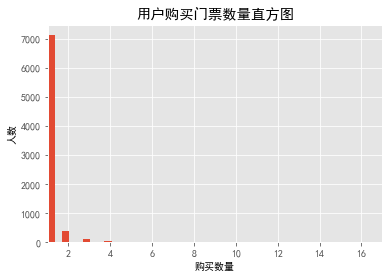

In [10]:
df.groupby('author')['frequency'].count().plot.hist(bins=50) #影响柱子的宽度，宽度=（最大值-最小值）/bins
plt.xlim(1,17) #因为不对x进行限制会出现小数，步符合实际
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票数量直方图')
#大部分人都购买了1次，用户量在7前人次左右，少部分人购买了2-4张门票，猜测：用户是附近居民，购买了多

b2. 用户购买门票2次以以上的情况分析

In [11]:
df_fre=df.groupby('auther').count().reset_index()
df_fre[df_fre['frequency']>=2]/

               author  rating  time  year  amount  frequency  month
0             wenbiao       1     1     1       1          1      1
1   Goh Yu Wen Eunice       1     1     1       1          1      1
2            Hui Shan       1     1     1       1          1      1
3              Huihui       1     1     1       1          1      1
4            KO-CHENG       1     1     1       1          1      1


Text(0.5, 1.0, '购买门票早2次以及以上的用户数量')

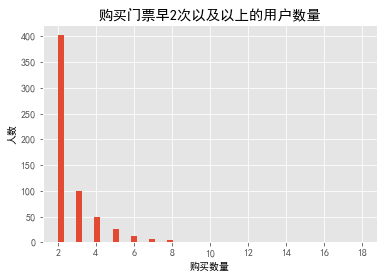

In [22]:
df_frequency_2=df.groupby('author').count().reset_index()
print(df_frequency_2.head())
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票早2次以及以上的用户数量')
#消费两次的用户在整体上占比较大，但是大于2次的站少部分，用户购买次数最多为8次

b3. 查看购买两次以及以上的具体人数

In [12]:
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()
#出去购买一次的顾客，可以看出购买2次的又402人 ，购买数量18次的有1人
#依次类推得知绝大多数人倾向于购买2-5次

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

b4. 购买次数在1次-5次的用户占比

##### groupby函数的介绍

https://zhuanlan.zhihu.com/p/101284491

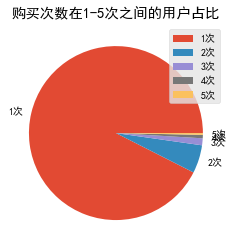

In [13]:
# 对用户（author）进行分组--》取每个游客的消费次数进行逻辑判断--》数据可视化（饼图）
df_frequency_gte_1=df.groupby('author')['frequency'].sum().reset_index()
df_frequency_gte_1.tail(60)

#购买次数>=1次的
df_frequency_gte_1=df_frequency_gte_1[df_frequency_gte_1['frequency']>=1]
#购买次数<=5次的
#下面是按照frequency分组，并且计算分组之后非空的数量，groupby本质上是将dateframe按照组转变为一个个的dateframe
values=df_frequency_gte_1[df_frequency_gte_1['frequency']<=5].groupby('frequency')['frequency'].count()
values #此时values是dateframe数据类型，也就是series数据类型，但绘制饼图的时候需要时列表，所以强制转换成列表
values=list(values)

#绘制饼图
labels=['1次','2次','3次','4次','5次']
plt.pie(values,labels=labels)
plt.title('购买次数在1-5次之间的用户占比')
plt.legend()

b4. 购买次数在2次-5次的用户占比

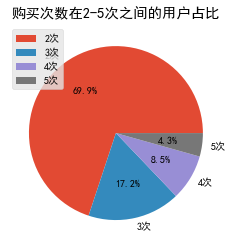

In [14]:
# 对用户（author）进行分组--》取每个游客的消费次数进行逻辑判断--》数据可视化（饼图）
df_frequency_gte_2=df.groupby('author')['frequency'].sum().reset_index()
df_frequency_gte_2.tail(60)

#购买次数>=1次的
df_frequency_gte_2=df_frequency_gte_2[df_frequency_gte_2['frequency']>=2]
#购买次数<=5次的
values=df_frequency_gte_2[df_frequency_gte_2['frequency']<=5].groupby('frequency')['frequency'].count()
values #此时values是dateframe数据类型，也就是series数据类型，但绘制饼图的时候需要时列表，所以强制转换成列表
values=list(values)

#绘制饼图
labels=['2次','3次','4次','5次']
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('购买次数在2-5次之间的用户占比')
plt.legend()
#购物次数在2-5次，其中消费两次的占比70%,3次的占比17%，4次的8%
#消费两次。三次的用户仍然很重要，消费4、5次的用户比重较小，需要针对性的对2，3次的用户进行引导
#消费次数在1次的用户可以尝试转换到消费2，3次

c1 复购率分析
- 再某一时间窗口（经常是1个月）(month)内消费次数(frequency)在2次以及以上的用户(author)在总消费用户的占比


In [25]:
#提取数据
#数据透视表操作
pivot_count=df.pivot_table(
    index='author',
    columns='month',
    values='frequency',
    aggfunc='count'
).fillna(0) #对于NaN用0值填充
#print(pivot_count.head())
# 三种情况
#1） 消费次数>1:复购用户，用1表示
# 消费次数=1：非复购用户，用0表示
# 消费次数=0：为消费用户，用NaN表示

#applymap:df处理每一个元素,可以处理一整张dateframe表格
#apply:处理每一行或者一列数据，这里处理一整行的元素
#map:series,处理每一个元素，只是处理一列的数据
#下面的改成map会报错
pivot_count=pivot_count.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
print(pivot_count.head())
pivot_count[pivot_count['2016-09-01']==1]

#求复购率:复购人数/总用户数
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('时间（月）')
plt.ylabel('百分比（%）')
plt.title('16-19年每月用户复购率')
#16年9月份复购率最高达到了7.5%,之后开始下降，区域平稳在 2%左右

AttributeError: 'DataFrame' object has no attribute 'map'

c2. 复购用户人数

Text(0.5, 1.0, '16-19年每月的复购人数折线图')

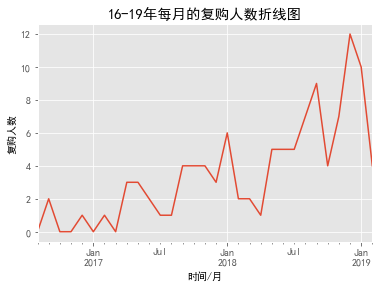

In [19]:
pivot_count.sum().plot()
plt.xlabel('时间/月')
plt.ylabel('复购人数')
plt.title('16-19年每月的复购人数折线图')
# 整体来看复购人数呈现上升趋势，但在18年的2，3，4，10和19年的2月份，复购人数下降较为明显，出现异常信号，需要和业务部门具体情况具体分析

c3. 回购率分析
- 在某一个时间窗口内消费国的用户在下一个时间窗口仍消费的占比

In [26]:
pivot_purchase=df.pivot_table(
    index='author',
    columns='month',
    values='frequency',
    aggfunc='count'
).fillna(0)
pivot_purchase.head()
#len(pivot_purchase.columns) #说明总共有31个月份

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, '回购率%')

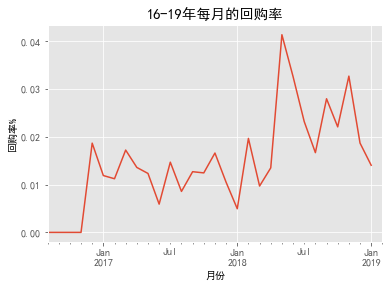

In [28]:
def purchase_return(data): #data表示每一名游客的所有月份消费记录
    status=[] #存储每一个月的回购状态
    for i in range(30):#总共有31个月
        # 当前月份消费
        if data[i]>=1:
            if data[i+1]==1: #下个月有消费是回购用户
                status.append(1)
            else: #未消费
                status.append(0) #非回购用户：0
            pass
        else: ## 本月没有消费
            status.append(np.NaN)
    #因为最后一列也就是第31个月后面的数据是没有的所以加np.NaN
    status.append(np.NaN)
    return pd.Series(status,pivot_purchase.columns)
#用户回购状态
pivot_purchas_return=pivot_purchase.apply(purchase_return,axis=1) #因为是行或者列，所以用apply，axis=1表示按照列进行操作
(pivot_purchas_return.sum()/pivot_purchas_return.count()).plot() #回购率
plt.title('16-19年每月的回购率')
plt.xlabel('月份')
plt.ylabel('回购率%')
#回购率最高在18年6月份达到4%
#整体来看，回购率呈现微弱的上升趋势
#出现了几次较大的下滑，分别是17年6月份，18年1月份，18年8月份，19年1月份

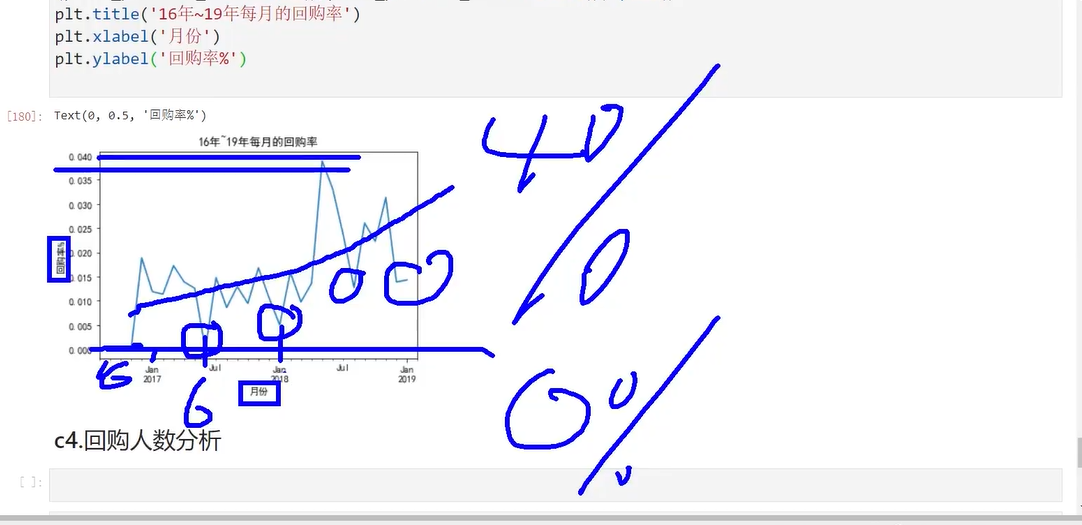

In [ ]:
c4. 回购人数分析

Text(0, 0.5, '回购人数')

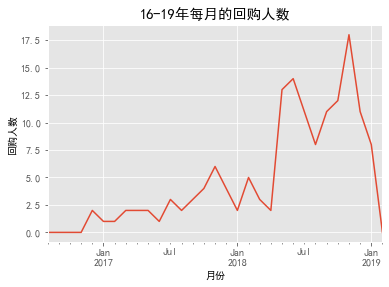

In [29]:
(pivot_purchas_return.sum()).plot() #回购率
plt.title('16-19年每月的回购人数')
plt.xlabel('月份')
plt.ylabel('回购人数')
#整体呈现上升趋势，回购人数最多时候在18年11月份，人数为17人
#其中有几次回购人数下降比较明显，主要分别是17年6月份，18年1月份，18年8月份，19年1月份

c5. 每个月分层用户占比情况
- 活跃用户|不活跃用户|回流用户|新用户

In [27]:
import pandas as pd

data = {
    'A': [1, 2, 2, 3, 3],
    'B': ['a', 'b', 'b', 'c', 'c']
}

df = pd.DataFrame(data)
print(df)
result = df.apply(pd.value_counts)
result

   A  B
0  1  a
1  2  b
2  2  b
3  3  c
4  3  c


,A,B
1,1.0,NaN
2,2.0,NaN
3,2.0,NaN
a,NaN,1.0
b,NaN,2.0
c,NaN,2.0


<Axes: xlabel='month'>

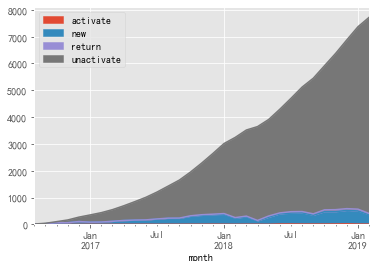

In [29]:
def active_status(data):
    status=[]
    #本月没有消费
    for i in range(31):
        if data[i]==0:
            if len(status)==0: #表示前面没有记录，也就是97年1月份的数据
                status.append('unreg')
            else: #判断上一个月的状态
                if status[i-1]=='unreg': #也就是一直没有消费过
                    status.append('unreg')
                else: #new/activate/unactivate/return 
                    status.append('unactivate') #不管上个月是否消费国，本月都是不活跃用户
        #本月有消费
        else:
            if len(status)==0: #前面没有任何记录（97年1月）
                status.append('new') #第一次消费
            else:
                if status[i-1]=='unactivate':
                    status.append('return') #本月消费，上个月没消费
                elif status[i-1]=='unreg':
                    status.append('new')
                else:#new/activate/return
                    status.append('activate')
    return pd.Series(status,pivot_purchase.columns) #值status,列明df_purchase中的列名
                
pivot_purchase_status=pivot_purchase.apply(active_status,axis=1)   
pivot_purchase_status.head()
#将unreg状态替换成NaN为了方便后面的计算，count(),sum() 这样的计算
pivot_status_count=pivot_purchase_status.replace('unreg',np.NaN).apply(pd.value_counts)  #aplly默认按照列统计，符合要求
pivot_status_count.T.plot.area() #.T表示行列变换，area表示绘制面积图
#可以看出不活跃用户占据网站用户的主题
#新用户从17年1月到19年1月呈现上升趋势，但是在18年4月份左右，新用户的量急剧下降，异常信号
#以后新用户又开始逐渐上涨，恢复稳定状态
#回流用户一直维持稳定状态，但是在18年2-4月份出现异常下降情况，异常信号

c6. 每月不同用户的占比

In [32]:
return_rate=pivot_status_count.apply(lambda x:x/x.sum()) #按照列进行计算，x.sum()是对每一列进行求和,默认的axis=0
return_rate
#.T.plot()
#在17年1月份过后，网站用户主体由不活跃用户组成，新用户占比开始逐步下降，并且趋于稳定在10%左右
#活跃用户和新用户一直稳定，并且占比比较小
#16年9月前后新用户和不活跃用户发生较大变换，猜测：活动或者节假日造成。。。

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
activate,NaN,NaN,NaN,NaN,NaN,0.012346,0.006173,0.006173,0.012346,0.012346,...,0.012346,0.080247,0.086420,0.067901,0.067901,0.067901,0.086420,0.123457,0.067901,0.055556
new,0.001943,0.003497,0.007900,0.008159,0.013727,0.010490,0.011008,0.014504,0.018389,0.020202,...,0.034447,0.049469,0.052707,0.054390,0.042735,0.060088,0.059700,0.065139,0.063455,0.045584
return,NaN,NaN,NaN,0.001328,0.001328,0.001328,0.003984,0.003984,0.003984,0.005312,...,0.061089,0.045153,0.070385,0.063745,0.069057,0.090305,0.099602,0.086321,0.090305,0.059761
unactivate,NaN,0.000192,0.000537,0.001304,0.002110,0.003440,0.004463,0.005549,0.006969,0.008772,...,0.046019,0.049433,0.054062,0.059368,0.064687,0.068702,0.074507,0.080453,0.086962,0.093547


c7. 每月活跃用户的占比

#因为return,activate在上面的图像不是很明显，没办法看出其走势

Text(0.5, 1.0, '每月活跃用户的占比分析')

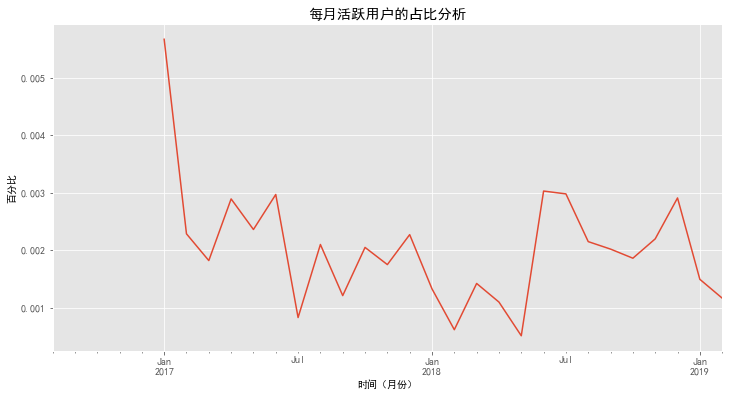

In [42]:
return_rate.T['activate'].plot(figsize=(12,6))
plt.xlabel('时间（月份）')
plt.ylabel('百分比')
plt.title('每月活跃用户的占比分析')

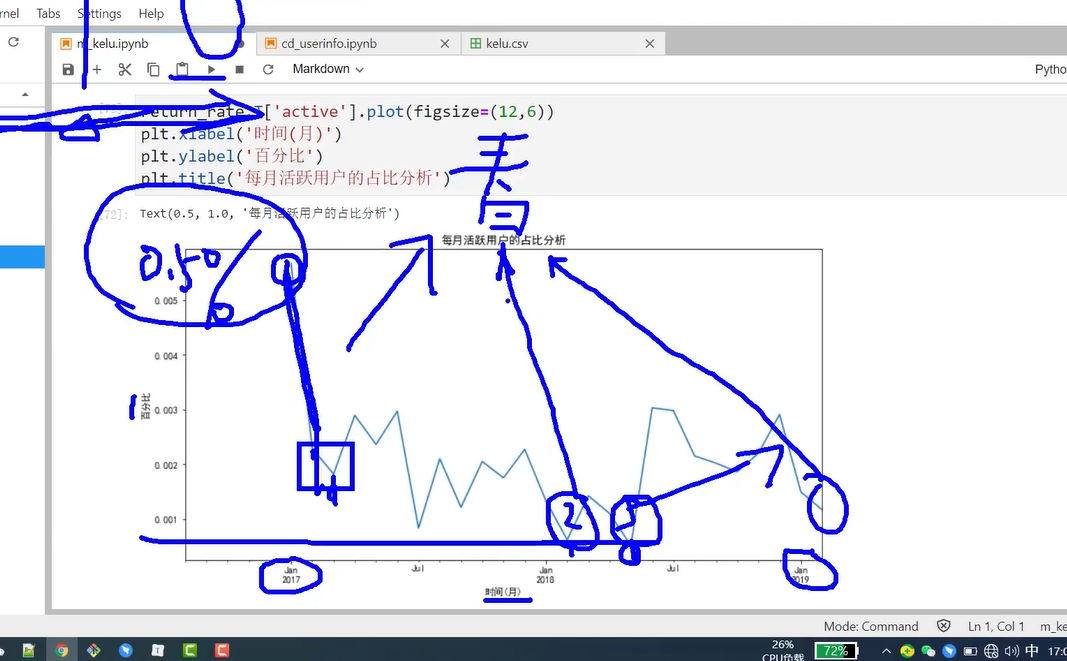
- 在17年1月份活跃用户占比比较高在0.5%左右，但是在1-2月份急剧下降，猜测：春节的影响，或者温度
- 结合理念1-2月份的销量来看，都会出现一定比例的下降，再次验证了我们的猜测：春节的影响
- 在18年的2月和5月出现异常，门票销量下降，猜测：雨水或者台风的影响

c8. 每月回流用户占比

Text(0.5, 1.0, '每月回流用户的占比分析')

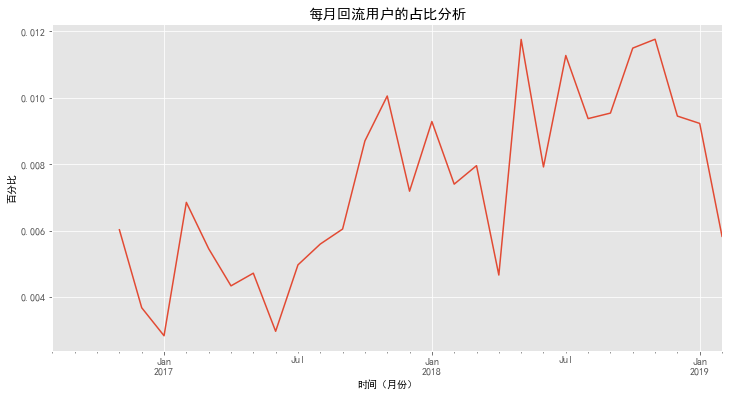

In [44]:
return_rate.T['return'].plot(figsize=(12,6))
plt.xlabel('时间（月份）')
plt.ylabel('百分比')
plt.title('每月回流用户的占比分析')
#在17年1月和6月，18年4月，19年2月，回流用户比例都出现了较大幅度的下降，表现为有异常信号
#不管是会用用户还是活跃用户，在以上几个月月份中都表现出下降趋势

In [45]:
return_rate.T['return'].mean() 
#回流用户的平均值在0.73%左右
#上面的当数据量较大的时候计算效率很低，可以采用下面的方式
np.mean(return_rate.T['return'])
#在17年9月份以后，仅有两个异常点在平均值以下
#在17年的9月份以前，所有数据都显示处回流用户比例低于平均值，猜测：经典开放不久，很多游客未发现本景点或者
#本景点在该平台刚上线不久

0.00736823576229978

d1. 用户的生命周期
- 计算方式：每一个用户最后一次购买商品的时间检出用户第一次购买商品的时间，转换成天数，即为生命周期
    - 如果生命周期为0未必说明只购买了一次

In [50]:
time_min=df.groupby('author')['time'].min()
time_max=df.groupby('author')['time'].max()
time_min,time_max
life_time=(time_max-time_min).reset_index() #自动建立索引列
print(df) 
life_time.describe()
#原样本8757条数据，count=7722得知，存在一个用户多次消费的情况
#平均的生命周期天数23天数，通过25%，50%，75%分位数得知，绝大多数的生命周期为0天
#最大生命周期为864天

                     author  rating       time  year  amount  frequency  \
0                     YOUNG      60 2019-02-28  2019     110          1   
1                 SHING YAN     100 2019-02-28  2019     110          1   
2                       Sha      60 2019-02-28  2019     110          1   
3                  Mary Mae     100 2019-02-28  2019     110          1   
4            Maria Cristina     100 2019-02-28  2019     110          1   
...                     ...     ...        ...   ...     ...        ...   
8752               Jonathan     100 2016-08-06  2016     110          1   
8753  Oliver Stephen Ah Kam     100 2016-08-05  2016     110          1   
8754                 Halley     100 2016-08-05  2016     110          1   
8755        ANDREW WEIQIANG     100 2016-08-03  2016     110          1   
8756              WEI CHIEH      60 2016-08-02  2016     110          1   

          month  
0    2019-02-01  
1    2019-02-01  
2    2019-02-01  
3    2019-02-01  
4    2019

,time
count,7722
mean,23 days 01:45:32.867132867
std,98 days 16:47:46.849668504
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,864 days 00:00:00


d2. 用户生命周期直方图

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7722 entries, 0 to 7721
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   author     7722 non-null   object         
 1   time       7722 non-null   timedelta64[ns]
 2   lie_time   7722 non-null   float64        
 3   life_time  7722 non-null   float64        
dtypes: float64(2), object(1), timedelta64[ns](1)
memory usage: 241.4+ KB
                  author   time  lie_time  life_time
0                wenbiao 0 days       0.0        0.0
1      Goh Yu Wen Eunice 0 days       0.0        0.0
2               Hui Shan 0 days       0.0        0.0
3                 Huihui 0 days       0.0        0.0
4               KO-CHENG 0 days       0.0        0.0
...                  ...    ...       ...        ...
7717                  芊羽 0 days       0.0        0.0
7718                  華山 0 days       0.0        0.0
7719                   蘇 0 days       0.0        0.0
77

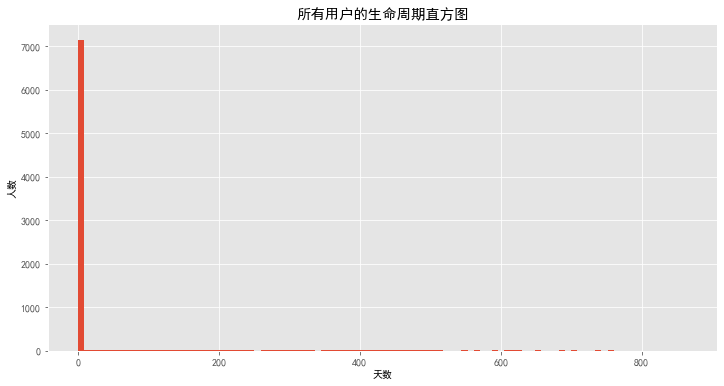

In [60]:
life_time.info() #timedelta64[ns]时间列是这个类型
#life_time['time'].plot.hist()
#此时会出现类型的错误，所以需要对时间列进行类型转换
#将日期类型转变为数值类型
life_time['life_time']=life_time['time']/np.timedelta64(1,'D')
life_time['life_time'].plot.hist(bins=100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户的生命周期直方图')
print(life_time[life_time['life_time']==0])
#生命周期为0用户（仅仅在一天内有过消费，之后再没有过消费过）,存在7130个用户
#由于总用户数为7722，其余592人属于优质忠诚客户


d3. 生命周期大于0天的（因为上面的图对生命周期大于0的用户不直观）

300.9662162162162

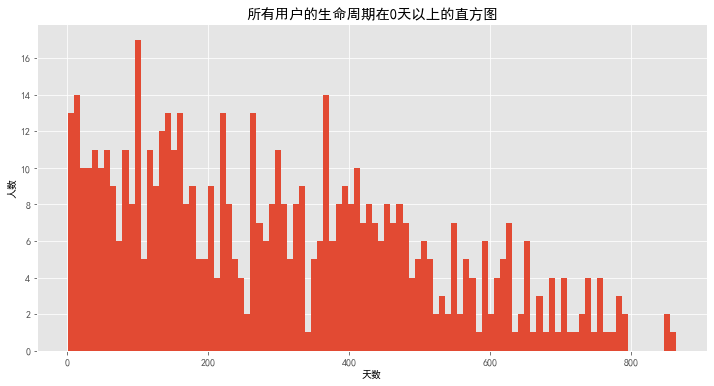

In [63]:
life_time[life_time['life_time']>0]['life_time'].plot.hist(bins=100,figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户的生命周期在0天以上的直方图')
life_time[life_time['life_time']>0]['life_time'].mean()
#去掉生命周期为0的用户之后可知用户的平均生命周期为300天
#生命周期在100天的用户量达到了最大值17人
#生命周期100到350天来看，用户量呈现下降趋势
#350天到800左右，用户量下降速度明显，存在一定的用户流失，而忠诚用户越来越少

d4 各时间段的用户留存率


In [69]:
# np.cut函数:看落到哪个区间里面了
np.random.seed(666) #保证每次运行程序产生的随机数都是相同的,可以试试将其去掉之后的结果
score_list=np.random.randint(25,100,size=3)
score_list
bins=[0,59,70,80,100] #指定多个区间
score_cut=pd.cut(score_list,bins)
score_cut

[(0, 59], (59, 70], (0, 59]]
Categories (4, interval[int64, right]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]

time_diff_bin
(0, 90]       0.022663
(90, 180]     0.019814
(180, 270]    0.016058
(270, 360]    0.014893
(360, 450]    0.014375
(450, 540]    0.009842
(540, 630]    0.007641
(630, 720]    0.004921
(720, 810]    0.002720
(810, 900]    0.000389
dtype: float64


Text(0.5, 1.0, '各时间段内的用户留存率')

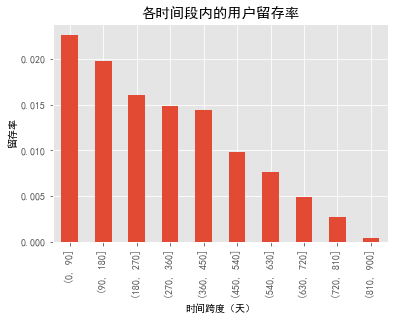

In [89]:
#留存率：1-90天有多少留存用户，求出用户的留存天数，比如：留存天数==98，属于1-90天内的留存用户
#留存天数计算方式：用户每一次的消费时间分别减去用户第一次消费的时间

#left 左表，right 右表， how 连接方式，on 连接字段， suffixes 针对相同列明指定不同的后缀
user_purchase_retention=pd.merge(left=df,right=time_min.reset_index(),how='inner',on='author',suffixes=('','_min')) #将其转变成datafreme数据类型
user_purchase_retention

#计算留存天数
user_purchase_retention['time_diff']=user_purchase_retention['time']-user_purchase_retention['time_min']
#将time_diff转成数值
user_purchase_retention['time_diff']=user_purchase_retention['time_diff'].apply(lambda x:x/np.timedelta64(1,'D'))
user_purchase_retention

#生成时间跨度（3个月，也就是90天）并且判断属于哪个区间
bin=[i*90 for i in range(11)] 
user_purchase_retention['time_diff_bin']=pd.cut(user_purchase_retention['time_diff'],bin)

#统计每个游客在不同时间段内的消费频率和值（便于稍后判断用户在某个区间内是否是留存用户）
#unstack()可以将每列的统计信息垂直排列。
pivot_retention=user_purchase_retention.groupby(['author','time_diff_bin'])['frequency'].sum().unstack()

#判断是否为留存用户（1：留存，0：没有留存）
pivot_retention_trans=pivot_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivot_retention_trans.tail(60)

#留存率的计算
print(pivot_retention_trans.sum()/pivot_retention_trans.count())
(pivot_retention_trans.sum()/pivot_retention_trans.count()).plot.bar()
plt.xlabel('时间跨度（天）')
plt.ylabel('留存率')
plt.title('各时间段内的用户留存率')


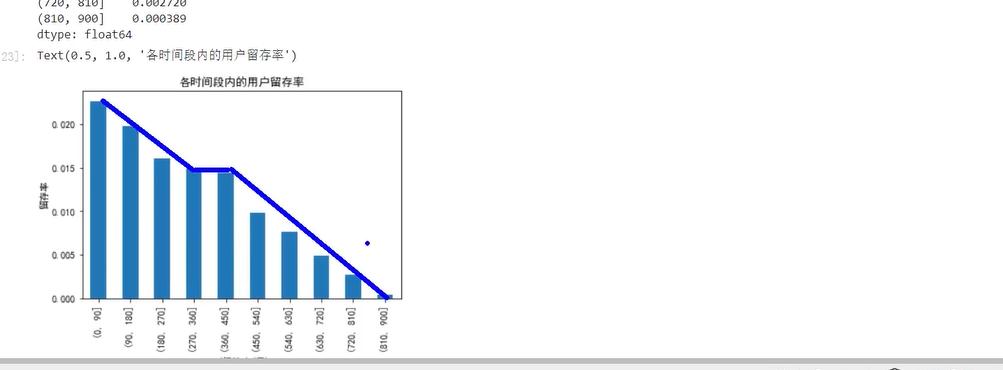
- 分析
    - 每个周期是三个月，第一个周期的留存率在2.2%左右，前三个周期的递减速度在0.3%左右，之后在低4，5周期的时候趋于平稳，稳定在留存率1.5%左右，从第五个周期开始留存率明显下降，下降到几乎0%，在第四、五周期（1年）的时候需要采取方法将用户留住进行再次消费
    - 如果在跨度一年的时候不召回用户，面临用户大量流失的风险

公司关注的是复购率回购率等。

用户的平均购买周期？如何求解